<h1>Team Name: AKR </h1></p>
<h2>Project Name: Wine Quality evaluation</h2></p>
Team member: Aarav Patel, Kaushal Patel, and Ruth Ann Phillippi

## 1. **Section 1: Environment Setup**

### 1.1 Import Required Libraries

In [ ]:
#import required libarary
!pip install kaggle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

# Importing everything needed for project here to make the project cleaner. 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2. Download Dataset using API

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'ap2684'
os.environ['KAGGLE_KEY'] = 'ea0e90c0c07a3dbeb8a66c4b7843f25d'

dataset_path = '/content/drive/MyDrive/wine_quality_dataset'
if os.path.exists(dataset_path):
    !rm -rf $dataset_path

!kaggle datasets download -d yasserh/wine-quality-dataset -p /content/drive/MyDrive/wine_quality_dataset
!unzip /content/drive/MyDrive/wine_quality_dataset/wine-quality-dataset.zip -d /content/drive/MyDrive/wine_quality_dataset

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 15.5MB/s]
Archive:  /content/drive/MyDrive/wine_quality_dataset/wine-quality-dataset.zip
  inflating: /content/drive/MyDrive/wine_quality_dataset/WineQT.csv  


###1.3. Load Data

In [ ]:
dataset = '/content/drive/MyDrive/wine_quality_dataset/WineQT.csv'

df = pd.read_csv(dataset,header=None,encoding='utf-8')
print('Dataset Shape:', df.shape)
print('\n Dataset: \n')
df

Dataset Shape: (1144, 13)

 Dataset: 



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1140,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1141,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5,1594
1142,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6,1595


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1144 non-null   object
 1   1       1144 non-null   object
 2   2       1144 non-null   object
 3   3       1144 non-null   object
 4   4       1144 non-null   object
 5   5       1144 non-null   object
 6   6       1144 non-null   object
 7   7       1144 non-null   object
 8   8       1144 non-null   object
 9   9       1144 non-null   object
 10  10      1144 non-null   object
 11  11      1144 non-null   object
 12  12      1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


We found that there is no null data in this dataset. We also notice that, due to how we imported our data, the Column names are being imported as our first row of data.

In [ ]:
# Create New Dataframe removing first row of data
df_new = df[1:]

# Rename the columns
df_new.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates',
              'alcohol', 'quality', 'Id']

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 1 to 1143
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed_acidity         1143 non-null   object
 1   volatile_acidity      1143 non-null   object
 2   citric_acid           1143 non-null   object
 3   residual_sugar        1143 non-null   object
 4   chlorides             1143 non-null   object
 5   free_sulfur_dioxide   1143 non-null   object
 6   total_sulfur_dioxide  1143 non-null   object
 7   density               1143 non-null   object
 8   pH                    1143 non-null   object
 9   sulphates             1143 non-null   object
 10  alcohol               1143 non-null   object
 11  quality               1143 non-null   object
 12  Id                    1143 non-null   object
dtypes: object(13)
memory usage: 116.2+ KB


In [ ]:
# Convert from Objects to Float
df_converted = df_new.astype({'fixed_acidity':'float','fixed_acidity':'float', 'volatile_acidity':'float',
                              'citric_acid':'float', 'residual_sugar':'float', 'chlorides':'float',
                              'free_sulfur_dioxide':'float', 'total_sulfur_dioxide':'float',
                              'density':'float', 'pH':'float', 'sulphates':'float','alcohol':'float',
                              'quality':'int', 'Id':'int'})


# Confirm conversion
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 1 to 1143
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### 1.4. Extract X and Y

In [ ]:
# Extracting X and y values from dataframe 

X = df_converted.iloc[:, 0:10].values
y = df_converted.iloc[:, 11].values

print('Printing X: \n', X)
print('\nShape of X : ', X.shape)

print('\nPrinting y: \n', y)
print('\nShape of y : ', y.shape)

Printing X: 
 [[7.4     0.7     0.      ... 0.9978  3.51    0.56   ]
 [7.8     0.88    0.      ... 0.9968  3.2     0.68   ]
 [7.8     0.76    0.04    ... 0.997   3.26    0.65   ]
 ...
 [6.2     0.6     0.08    ... 0.9949  3.45    0.58   ]
 [5.9     0.55    0.1     ... 0.99512 3.52    0.76   ]
 [5.9     0.645   0.12    ... 0.99547 3.57    0.71   ]]

Shape of X :  (1143, 10)

Printing y: 
 [5 5 5 ... 5 6 5]

Shape of y :  (1143,)


### 1.5 Set Train and Test Sets

In [ ]:
#Split data
''' 
Splitting the dataset for traning and test. We will use 70% for traning and 
30% for testing.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print('Shape of X_train:', X_train.shape  )
print('Shape of X_test: ', X_test.shape  )
print('Shape of y_train:', y_train.shape  )
print('Shape of y_test: ', y_test.shape  )

# Count amount of each quality found in test data
print("\nThe count of quality in test data:\n",Counter(y_test))

# Count amount of each quality found in training data
print("\nThe count of quality in training data:\n",Counter(y_train))

#unique target values
classes = np.unique(y_test)

Shape of X_train: (800, 10)
Shape of X_test:  (343, 10)
Shape of y_train: (800,)
Shape of y_test:  (343,)

The count of quality in test data:
 Counter({5: 145, 6: 138, 7: 43, 4: 10, 8: 5, 3: 2})

The count of quality in training data:
 Counter({5: 338, 6: 324, 7: 100, 4: 23, 8: 11, 3: 4})


###1.6 Standardize the Data

In [ ]:
# Standardize the Data
sc = StandardScaler()

# Standardize all Data
X_std = sc.fit_transform(X)

# Fit only on the X_train data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 1.7 Add Polonomials to Dataset

In [ ]:
# Review shapes of standardized data
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (800, 10)
X_test shape: (343, 10)


In [ ]:
# Try Polynomial where degree = 2
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.fit_transform(X_test_std)
print('X_train_poly shape:',X_train_poly.shape)
print('X_test_poly shape:',X_test_poly.shape)

X_train_poly shape: (800, 65)
X_test_poly shape: (343, 65)


In [ ]:
# Try Polynomial where degree = 3
cube = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
X_train_cube = cube.fit_transform(X_train_std)
X_test_cube = cube.fit_transform(X_test_std)
print('X_train_cube shape:',X_train_cube.shape)
print('X_test_cube shape:',X_test_cube.shape)

X_train_cube shape: (800, 285)
X_test_cube shape: (343, 285)


###1.8 Define Plot Decision Regions Function

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    This function is taken from  Module 13: Dimensionality Reduction, specifically
    the "Dimensionality Reduction with PCA and kernel PCA.ipynb"
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v',".","p","P","D","X")
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'gold', 'fuchsia',
              'royalblue', 'blueviolet', 'lime')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    #edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# 2. **Section 2: Data Exploration**

In [ ]:
# Explore data 
df_converted.describe().applymap(lambda x: f"{x:0.3f}")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.393,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


# 3. **Section 3: Initial Training Models**

## 3.1. Naive Bayes

In [ ]:
# Traning and gathering statistics
print('\nTraining and testing using Gaussian Naive Bayes ...')
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Calculate Predicted Values
training_predictions_gnb = gnb.predict(X_train)
predictions_gnb = gnb.predict(X_test)

# Calculate Accuracy
accuracy_naive_bayes_train = accuracy_score(y_train, training_predictions_gnb)
accuracy_naive_bayes = accuracy_score(y_test, predictions_gnb);

# Print Results
print('\nAccuracy on training data using naive_bayes:',
      round(accuracy_naive_bayes_train * 100, 2))
print('Accuracy on testing data using naive_bayes:',
      round(accuracy_naive_bayes * 100, 2))


Training and testing using Gaussian Naive Bayes ...

Accuracy on training data using naive_bayes: 45.38
Accuracy on testing data using naive_bayes: 48.4


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.65      0.43      0.52       145
           6       0.51      0.62      0.56       138
           7       0.47      0.37      0.42        43
           8       0.04      0.20      0.06         5

    accuracy                           0.48       343
   macro avg       0.28      0.27      0.26       343
weighted avg       0.54      0.48      0.50       343



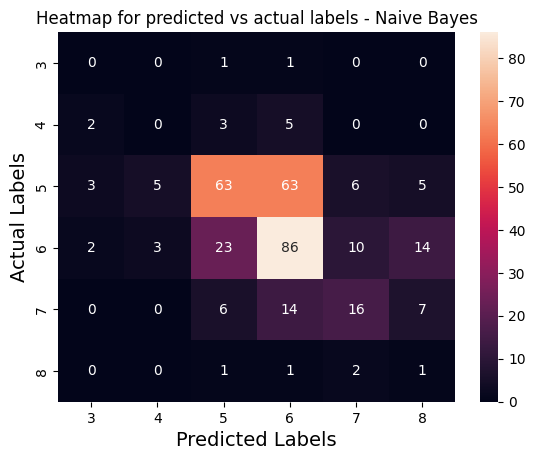

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_gnb)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Naive Bayes")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,predictions_gnb))

## 3.1.1 Cross Validation on Naive Bayes

In [ ]:
scores = cross_val_score(gnb, X, y, cv=5)
print('Cross-validation scores for Naive Bayes:', scores)
print('\n Average cross-validation score for Naive Bayes: ', round(((scores.mean()) * 100), 2), '%')

Cross-validation scores for Naive Bayes: [0.40611354 0.47161572 0.46724891 0.54385965 0.44736842]

 Average cross-validation score for Naive Bayes:  46.72 %


## 3.2. Decision Tree

In [ ]:
# Traning and gathering statistics
print('\nTraining and testing using Decision Tree ...')
cdt = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=9, 
                                    random_state=0)

# Applying different max_depth we found 9 to have best accuracy score
cdt.fit(X_train, y_train)

# Calculate Predicted Values
train_predictions_cdt = cdt.predict(X_train)
predictions_cdt = cdt.predict(X_test)

# Calculate Accuracy
accuracy_cdt_train = accuracy_score(y_train, train_predictions_cdt)
accuracy_cdt = accuracy_score(y_test, predictions_cdt)

# Print Results
print('\nAccuracy on training data using Decision Tree:', round(accuracy_cdt_train * 100, 2))
print('Accuracy on testing data using Decision Tree:', round(accuracy_cdt * 100, 2))


Training and testing using Decision Tree ...

Accuracy on training data using Decision Tree: 83.38
Accuracy on testing data using Decision Tree: 54.23


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.66      0.59      0.62       145
           6       0.54      0.59      0.57       138
           7       0.43      0.42      0.42        43
           8       0.11      0.20      0.14         5

    accuracy                           0.54       343
   macro avg       0.29      0.30      0.29       343
weighted avg       0.55      0.54      0.55       343



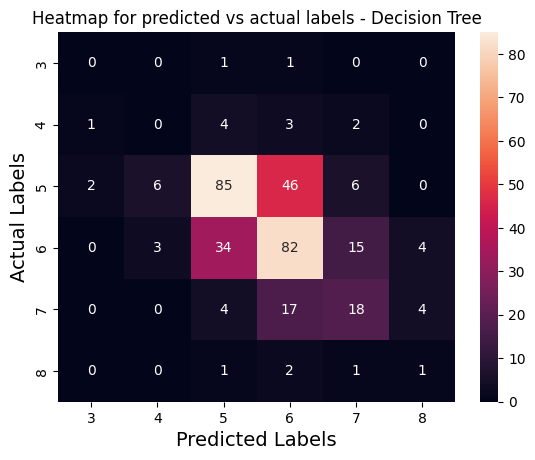

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_cdt)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Decision Tree")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,predictions_cdt))

### 3.2.1 Cross Validation on Decision Tree


In [ ]:
scores = cross_val_score(cdt, X, y, cv=5)
print('Cross-validation scores for decision tree:', scores)
print('\n Average cross-validation score for decision tree: ', round(((scores.mean()) * 100), 2), '%')

Cross-validation scores for decision tree: [0.50218341 0.4628821  0.47598253 0.46929825 0.45614035]

 Average cross-validation score for decision tree:  47.33 %


## 3.3. Logistic Regresstion

In [ ]:
# Training using Logistic Regression
print('\nTraning and testing using Logistic Regression ...')
lr = LogisticRegression()
lr.fit(X_train_std, y_train)


# Calculate Predicted Values
training_prediction_lr = lr.predict(X_train_std)
prediction_lr = lr.predict(X_test_std)

# Calculate Accuracy
accuracy_lr_train = accuracy_score(y_train, training_prediction_lr)
accuracy_lr = accuracy_score(y_test, prediction_lr)

# Print Results
print('\nAccuracy on training data using Logistic Regression: ', round(accuracy_lr_train * 100, 2))
print('Accuracy on testing data using Logistic Regression: ', round(accuracy_lr * 100, 2))


Traning and testing using Logistic Regression ...

Accuracy on training data using Logistic Regression:  60.62
Accuracy on testing data using Logistic Regression:  55.98


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.62      0.74      0.68       145
           6       0.51      0.52      0.51       138
           7       0.46      0.28      0.35        43
           8       0.00      0.00      0.00         5

    accuracy                           0.56       343
   macro avg       0.26      0.26      0.26       343
weighted avg       0.52      0.56      0.54       343



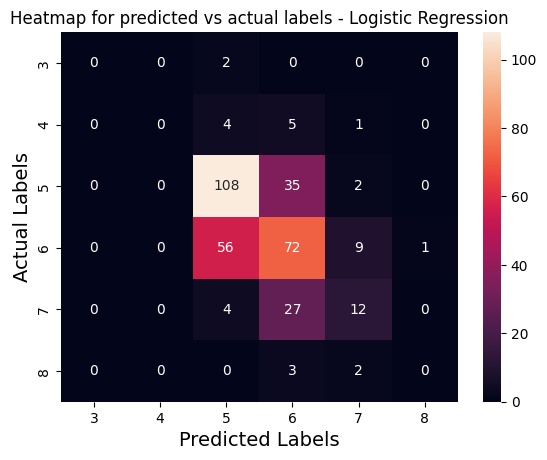

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Logistic Regression")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,prediction_lr))

#### 3.3.1 Cross Validation on Logistic Regression

In [ ]:
scores = cross_val_score(lr, X_std, y, cv=5)
print('Cross-validation scores for decision tree:', scores)
print('\n Average cross-validation score for decision tree: ', round(((scores.mean()) * 100), 2), '%')

Cross-validation scores for decision tree: [0.54585153 0.51091703 0.65938865 0.55701754 0.56578947]

 Average cross-validation score for decision tree:  56.78 %


## 3.4 Random Forest Classifier

In [ ]:
# Traning and gathering statistics
print('\nTraning and testing using Decision Tree ...')
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# Calculate Predicted Values
training_predictions_rfc = rfc.predict(X_train)
predictions_rfc = rfc.predict(X_test)

# Calculate Accuracy
accuracy_rfc_train = accuracy_score(y_train, training_predictions_rfc)
accuracy_rfc = accuracy_score(y_test, predictions_rfc)

# Print Results
print('\nAccuracy on training data using Randomized Forest Classifier:', round(accuracy_rfc_train * 100, 2))
print('Accuracy on training data using Randomized Forest Classifier', round(accuracy_rfc * 100, 2))


Traning and testing using Decision Tree ...

Accuracy on training data using Randomized Forest Classifier: 100.0
Accuracy on training data using Randomized Forest Classifier 64.43


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.71      0.80      0.75       145
           6       0.60      0.66      0.63       138
           7       0.52      0.33      0.40        43
           8       0.00      0.00      0.00         5

    accuracy                           0.64       343
   macro avg       0.30      0.30      0.30       343
weighted avg       0.61      0.64      0.62       343



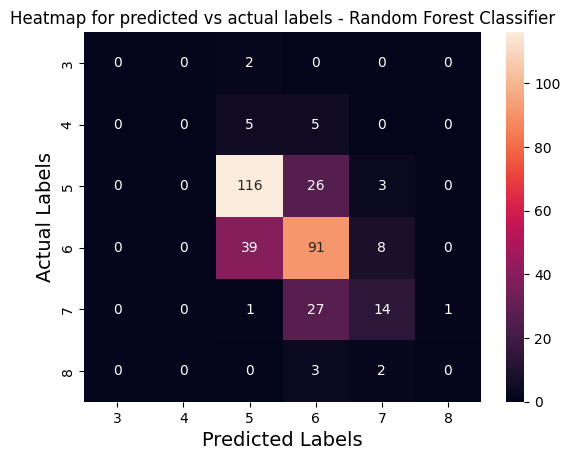

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_rfc)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Random Forest Classifier")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,predictions_rfc))

# Section 4: Feature Selection Methods

### 4.1 Principal Component Analysis (PCA)

In [ ]:
#process PCA method
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.31169349, 0.18418974, 0.132367  , 0.11339697, 0.08659771,
       0.05790325, 0.04316335, 0.03324886, 0.02671263])

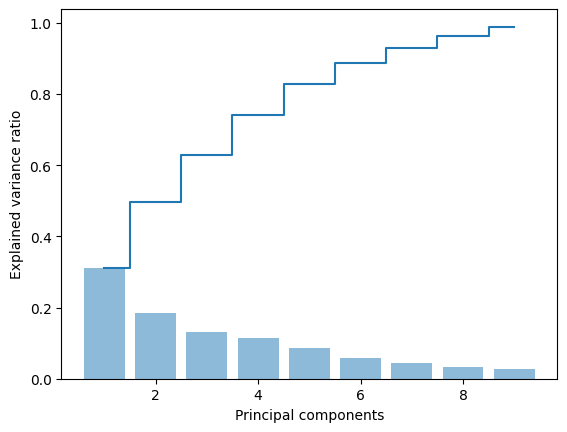

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

#Section 5: Advanced Exploration of Models

## 5.1 Naive Bayes

### 5.1.1 AdaBoost and Naive Bayes

In [ ]:
# Train using adaBoost
print('\nTraining and testing using AdaBoost on Naive Bayes ...')
adaBoost_naive = AdaBoostClassifier(estimator=gnb, n_estimators=200, random_state=0)
adaBoost_naive.fit(X_train, y_train)

# Calculate Predicted Values
training_prediction_ada_naive = adaBoost_naive.predict(X_train)
prediction_ada_naive = adaBoost_naive.predict(X_test)

# Calculate Accuracy
accuracy_ada_naive_train = accuracy_score(y_train, training_prediction_ada_naive)
accuracy_ada_naive = accuracy_score(y_test, prediction_ada_naive)

# Print Results
print('\nAccuracy on training data using AdaBoost on Naive Bayes:', round(accuracy_ada_naive_train * 100, 2))
print('Accuracy on testing data using AdaBoost on Naive Bayes:', round(accuracy_ada_naive * 100, 2))
print('\nAs a reminder, the Accuracy on testing data using JUST naive_bayes was:',
      round(accuracy_naive_bayes * 100, 2))
print('This means that AdaBoost helped us predict just over 6% more labels than just the Naive Bayes model on its own.')


Training and testing using AdaBoost on Naive Bayes ...

Accuracy on training data using AdaBoost on Naive Bayes: 51.38
Accuracy on testing data using AdaBoost on Naive Bayes: 55.1

As a reminder, the Accuracy on testing data using JUST naive_bayes was: 48.4
This means that AdaBoost helped us predict just over 6% more labels than just the Naive Bayes model on its own.


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.54      0.60       145
           6       0.49      0.78      0.60       138
           7       0.40      0.05      0.08        43
           8       0.00      0.00      0.00         5

    accuracy                           0.55       343
   macro avg       0.26      0.23      0.21       343
weighted avg       0.53      0.55      0.51       343



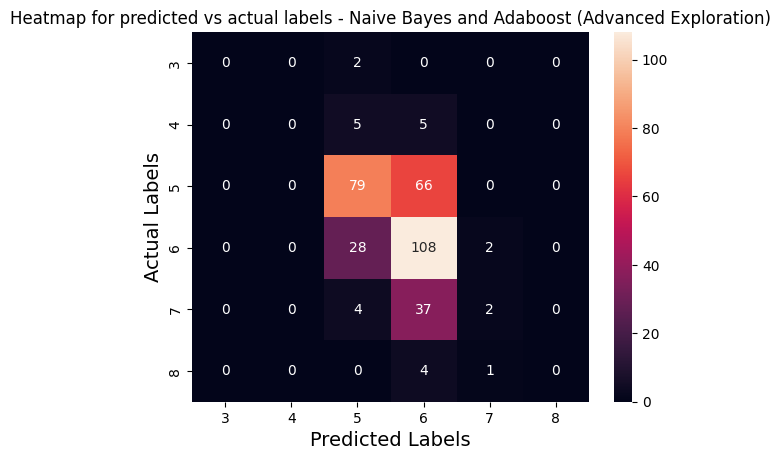

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction_ada_naive)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Naive Bayes and Adaboost (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
print(classification_report(y_test,prediction_ada_naive))

### 5.1.2 Naive Bayes on PCA

In [ ]:
# Traning and gathering statistics
print('\nTraning and testing using Decision Tree ...')
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

# Calculate Predicted Values
training_predictions_gnb_pca = gnb_pca.predict(X_train_pca)
predictions_gnb_pca = gnb_pca.predict(X_test_pca)

# Calculate Accuracy
accuracy_gnb_pca_train = accuracy_score(y_train, training_predictions_gnb_pca)
accuracy_gnb_pca = accuracy_score(y_test, predictions_gnb_pca)

# Print Results
print('\nAccuracy on training data using Naive Bayes on PCA:', round(accuracy_gnb_pca_train * 100, 2))
print('Accuracy on test data using Naive Bayes on PCA', round(accuracy_gnb_pca * 100, 2))


Traning and testing using Decision Tree ...

Accuracy on training data using Naive Bayes on PCA: 54.12
Accuracy on test data using Naive Bayes on PCA 53.94


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.10      0.11        10
           5       0.68      0.52      0.59       145
           6       0.53      0.71      0.60       138
           7       0.42      0.23      0.30        43
           8       0.09      0.20      0.13         5

    accuracy                           0.54       343
   macro avg       0.31      0.29      0.29       343
weighted avg       0.56      0.54      0.53       343



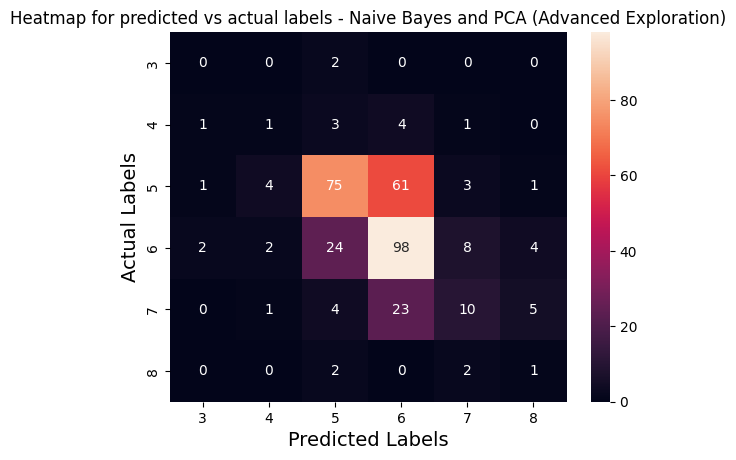

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_gnb_pca)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Naive Bayes and PCA (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
print(classification_report(y_test,predictions_gnb_pca ))

##5.2 Decision Tree

###5.2.1 AdaBoost and Decision Tree

In [ ]:
# Train using adaBoost
print('\nTraining and testing using AdaBoost on Decision Tree ...')
adaBoost_model = AdaBoostClassifier(estimator = cdt, n_estimators = 220, random_state = 0)
adaBoost_model.fit(X_train, y_train)

# Calculate Predicted Values
training_prediction_ada = adaBoost_model.predict(X_train)
prediction_ada = adaBoost_model.predict(X_test)

# Calculate Accuracy
accuracy_ada_train = accuracy_score(y_train, training_prediction_ada)
accuracy_ada = accuracy_score(y_test, prediction_ada)

# Print Results
print('\nAccuracy on training data using AdaBoost on Decision Tree:', round(accuracy_ada_train * 100, 2))
print('Accuracy on testing data using AdaBoost on Decision Tree:', round(accuracy_ada * 100, 2))
print('\nAppling adaBoost increases the accuray on average by 10%.')


Training and testing using AdaBoost on Decision Tree ...

Accuracy on training data using AdaBoost on Decision Tree: 100.0
Accuracy on testing data using AdaBoost on Decision Tree: 63.85

Appling adaBoost increases the accuray on average by 10%.


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.69      0.79      0.74       145
           6       0.59      0.67      0.62       138
           7       0.60      0.28      0.38        43
           8       0.00      0.00      0.00         5

    accuracy                           0.64       343
   macro avg       0.31      0.29      0.29       343
weighted avg       0.60      0.64      0.61       343



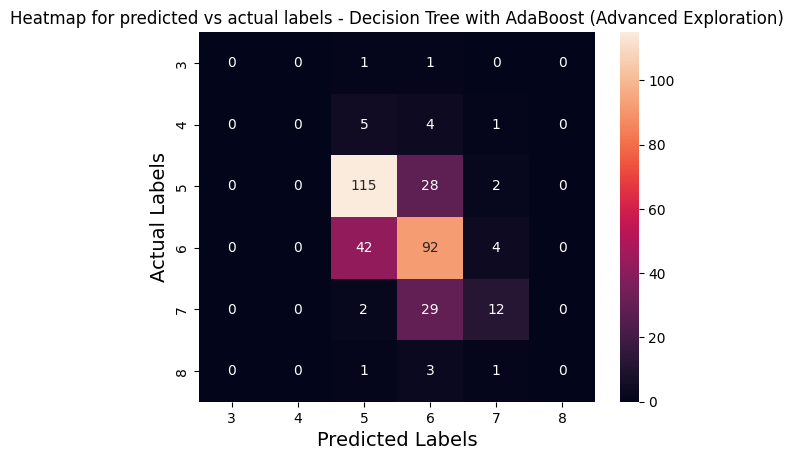

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction_ada)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Decision Tree with AdaBoost (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
print(classification_report(y_test,prediction_ada ))

In [ ]:
# Traning and gathering statistics
#print('\nTraning and testing using Decision Tree ...')
#rfc = RandomForestClassifier(random_state=0)

# Applying different max_depth we found 9 to have best accuracy score
#rfc.fit(X_train, y_train)
###prediction_rfc = rfc.predict(X_test)

#accuracy_rfc = accuracy_score(y_test, prediction_rfc)
#print('Accuracy using Decision Tree: ', round(accuracy_rfc * 100, 2))

###5.2.1 Decision Tree with PCA

In [ ]:
print('\nTraning and testing using Decision Tree ...')
cdt_pca = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=9, 
                                    random_state=0)
cdt_pca.fit(X_train_pca, y_train)

# Calculate Predicted Values
training_predictions_cdt_pca = cdt_pca.predict(X_train_pca)
predictions_cdt_pca = cdt_pca.predict(X_test_pca)

# Calculate Accuracy
accuracy_cdt_pca_train = accuracy_score(y_train, training_predictions_cdt_pca)
accuracy_cdt_pca = accuracy_score(y_test, predictions_cdt_pca)

# Print Results
print('\nAccuracy on training data using Decsion Tree with PCA:', round(accuracy_cdt_pca_train * 100, 2))
print('Accuracy on test data using Decsion Tree with PCA: ', round(accuracy_cdt_pca * 100, 2))


Traning and testing using Decision Tree ...

Accuracy on training data using Decsion Tree with PCA: 86.5
Accuracy on test data using Decsion Tree with PCA:  56.27


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.20      0.24        10
           5       0.64      0.68      0.66       145
           6       0.52      0.55      0.54       138
           7       0.52      0.40      0.45        43
           8       0.00      0.00      0.00         5

    accuracy                           0.56       343
   macro avg       0.33      0.30      0.31       343
weighted avg       0.55      0.56      0.56       343



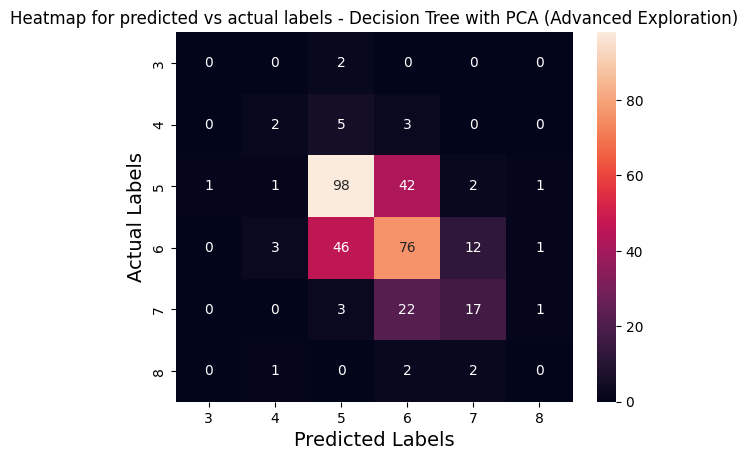

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_cdt_pca)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Decision Tree with PCA (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,predictions_cdt_pca))

## 5.3 Logistic Regression

### 5.3.1 Polynomial Exploration where Degree = 2

In [ ]:
# Training using Logistic Regression and Polynomials
print('\nTraning and testing using Logistic Regression ...')
lr_poly = LogisticRegression(max_iter = 2000)
lr_poly.fit(X_train_poly, y_train)

# Calculate Predicted Values
training_prediction_lr_poly = lr_poly.predict(X_train_poly)
prediction_lr_poly = lr_poly.predict(X_test_poly)

# Calculate Accuracy
accuracy_lr_poly_train = accuracy_score(y_train, training_prediction_lr_poly)
accuracy_lr_poly = accuracy_score(y_test, prediction_lr_poly)

# Print Results
print('\nAccuracy on training data using Logistic Regression poly degree = 2:', round(accuracy_lr_poly_train * 100, 2))
print('Accuracy on testing data using Logistic Regression poly degree = 2: ', round(accuracy_lr_poly * 100, 2))


Traning and testing using Logistic Regression ...

Accuracy on training data using Logistic Regression poly degree = 2: 67.62
Accuracy on testing data using Logistic Regression poly degree = 2:  56.85


In [ ]:
# Training using Logistic Regression and Polynomials with multi_class as
# one-vs-rest
print('\nTraning and testing using Logistic Regression ...')
lr_poly = LogisticRegression(max_iter = 2000, multi_class='ovr')
lr_poly.fit(X_train_poly, y_train)

# Calculate Predicted Values
training_prediction_lr_poly = lr_poly.predict(X_train_poly)
prediction_lr_poly = lr_poly.predict(X_test_poly)

# Calculate Accuracy
accuracy_lr_poly_train = accuracy_score(y_train, training_prediction_lr_poly)
accuracy_lr_poly = accuracy_score(y_test, prediction_lr_poly)

# Print Results
print('\nAccuracy on training data using Logistic Regression poly degree = 2:', round(accuracy_lr_poly_train * 100, 2))
print('Accuracy on testing data using Logistic Regression poly degree = 2: ', round(accuracy_lr_poly * 100, 2))


Traning and testing using Logistic Regression ...

Accuracy on training data using Logistic Regression poly degree = 2: 66.88
Accuracy on testing data using Logistic Regression poly degree = 2:  56.27


### 5.3.2 Polynomial Exploration where Degree = 3

In [ ]:
# Training using Logistic Regression and Polynomials with multi_class as
# one-vs-rest
print('\nTraning and testing using Logistic Regression ...')
lr_cube = LogisticRegression(max_iter = 2000)
lr_cube.fit(X_train_cube, y_train)

# Calculate Predicted Values
training_prediction_lr_cube = lr_cube.predict(X_train_cube)
prediction_lr_cube = lr_cube.predict(X_test_cube)

# Calculate Accuracy
accuracy_lr_cube_train = accuracy_score(y_train, training_prediction_lr_cube)
accuracy_lr_cube = accuracy_score(y_test, prediction_lr_cube)

# Print Results
print('\nAccuracy on training data using Logistic Regression poly degree = 3:', round(accuracy_lr_cube_train * 100, 2))
print('Accuracy on testing data using Logistic Regression poly degree = 3: ', round(accuracy_lr_cube * 100, 2))


Traning and testing using Logistic Regression ...

Accuracy on training data using Logistic Regression poly degree = 3: 87.38
Accuracy on testing data using Logistic Regression poly degree = 3:  57.14


In [ ]:
# Training using Logistic Regression and Polynomials with multi_class as
# one-vs-rest
print('\nTraning and testing using Logistic Regression ...')
lr_cube = LogisticRegression(max_iter = 2000, multi_class='ovr')
lr_cube.fit(X_train_cube, y_train)

# Calculate Predicted Values
training_prediction_lr_cube = lr_cube.predict(X_train_cube)
prediction_lr_cube = lr_cube.predict(X_test_cube)

# Calculate Accuracy
accuracy_lr_cube_train = accuracy_score(y_train, training_prediction_lr_cube)
accuracy_lr_cube = accuracy_score(y_test, prediction_lr_cube)

# Print Results
print('\nAccuracy on training data using Logistic Regression poly degree = 3:', round(accuracy_lr_cube_train * 100, 2))
print('Accuracy on testing data using Logistic Regression poly degree = 3: ', round(accuracy_lr_cube * 100, 2))


Traning and testing using Logistic Regression ...

Accuracy on training data using Logistic Regression poly degree = 3: 84.12
Accuracy on testing data using Logistic Regression poly degree = 3:  58.6


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.69      0.74      0.71       145
           6       0.55      0.59      0.57       138
           7       0.38      0.30      0.34        43
           8       0.00      0.00      0.00         5

    accuracy                           0.59       343
   macro avg       0.27      0.27      0.27       343
weighted avg       0.56      0.59      0.57       343



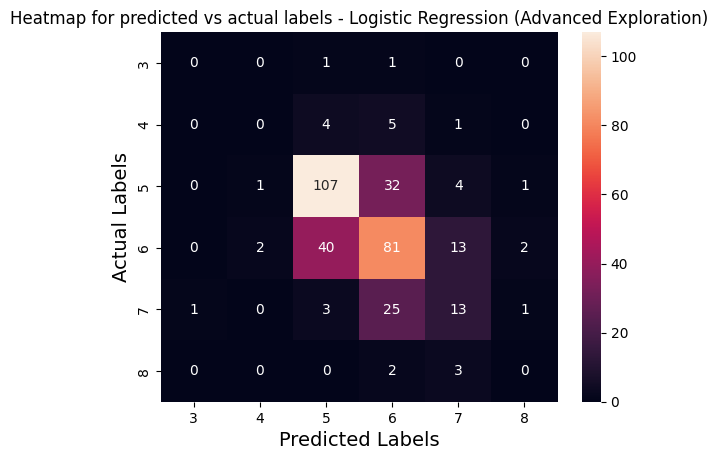

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction_lr_cube)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Logistic Regression (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,prediction_lr_cube))

### 5.3.2 PCA of top n Features

In [ ]:
# Create zero dataframe to update as n_components change
col_df = ("n_components","train_accuracy","test_accuracy")
new_pca_dataframe = pd.DataFrame(np.zeros((10, 3)), columns = col_df)
lr_pca_n = LogisticRegression(multi_class='ovr')
#lr_pca_n = LogisticRegression()


# For loop to test out all values for n_components except for n_components = 0
for feature in range(1,11):
  new_row = []
  pca = PCA(n_components = feature)
  X_train_pca = pca.fit_transform(X_train_std)
  X_test_pca = pca.transform(X_test_std)
  lr_pca_n = lr.fit(X_train_pca, y_train)

  # Calculate Predicted Values
  training_prediction_lr_pca = lr_pca_n.predict(X_train_pca)
  prediction_lr_pca = lr_pca_n.predict(X_test_pca)

  # Calculate Accuracy
  accuracy_lr_pca_train = round(accuracy_score(y_train, training_prediction_lr_pca)*100,2)
  accuracy_lr_pca = round(accuracy_score(y_test, prediction_lr_pca)*100,2)

  # Update dataframe with results
  new_row = [feature, accuracy_lr_pca_train, accuracy_lr_pca]
  new_pca_dataframe.iloc[feature-1] = new_row

# Output dataframe
new_pca_dataframe

,n_components,train_accuracy,test_accuracy
0,1.0,44.38,46.06
1,2.0,46.00,46.36
2,3.0,54.62,53.35
3,4.0,54.37,52.77
4,5.0,54.12,53.64
5,6.0,54.37,54.81
6,7.0,57.75,56.85
7,8.0,58.25,57.43
8,9.0,60.50,57.73
9,10.0,60.62,55.98


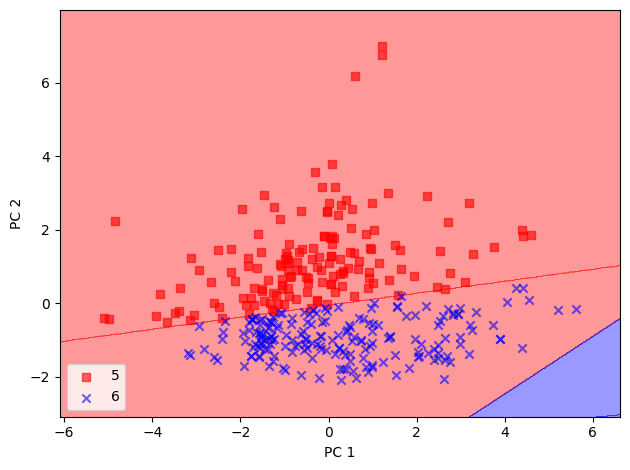

In [ ]:
# Create Graph using the top 2 features just to visualize the data
lr_pca_2 = PCA(n_components = 2)
X_train_pca_2 = lr_pca_2.fit_transform(X_train_std)
X_test_pca_2 = lr_pca_2.transform(X_test_std)

# Fit the model
lr_pca = lr.fit(X_train_pca_2, y_train)

# Calculate Predicted Values
training_prediction_lr_pca_2 = lr_pca.predict(X_train_pca_2)
prediction_lr_pca_2 = lr_pca.predict(X_test_pca_2)

# Graph
plot_decision_regions(X_test_pca_2, prediction_lr_pca_2, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.50      0.53      0.52       145
           6       0.43      0.59      0.50       138
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.46       343
   macro avg       0.16      0.19      0.17       343
weighted avg       0.39      0.46      0.42       343



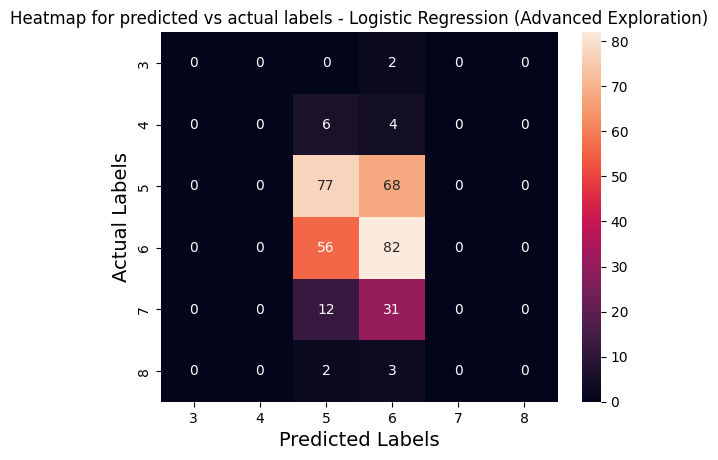

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction_lr_pca_2)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Logistic Regression (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,prediction_lr_pca_2))

## 5.4 Random Forest Classifier

In [ ]:
# Traning and gathering statistics
print('\nTraning and testing using Random Forest Classifier ...')
rfc = RandomForestClassifier(random_state=10, n_estimators=200)
rfc.fit(X_train_pca, y_train)

# Calculate Predicted Values
training_predictions_rfc = rfc.predict(X_train_pca)
predictions_rfc = rfc.predict(X_test_pca)

# Calculate Accuracy
accuracy_rfc_train = accuracy_score(y_train, training_predictions_rfc)
accuracy_rfc = accuracy_score(y_test, predictions_rfc)

# Print Results
print('\nAccuracy on training data using Randomized Forest Classifier:', round(accuracy_rfc_train * 100, 2))
print('Accuracy on testing data using Randomized Forest Classifier', round(accuracy_rfc * 100, 2))


Traning and testing using Random Forest Classifier ...

Accuracy on training data using Randomized Forest Classifier: 100.0
Accuracy on testing data using Randomized Forest Classifier 63.27


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.69      0.77      0.73       145
           6       0.59      0.67      0.63       138
           7       0.54      0.30      0.39        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       343
   macro avg       0.30      0.29      0.29       343
weighted avg       0.60      0.63      0.61       343



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


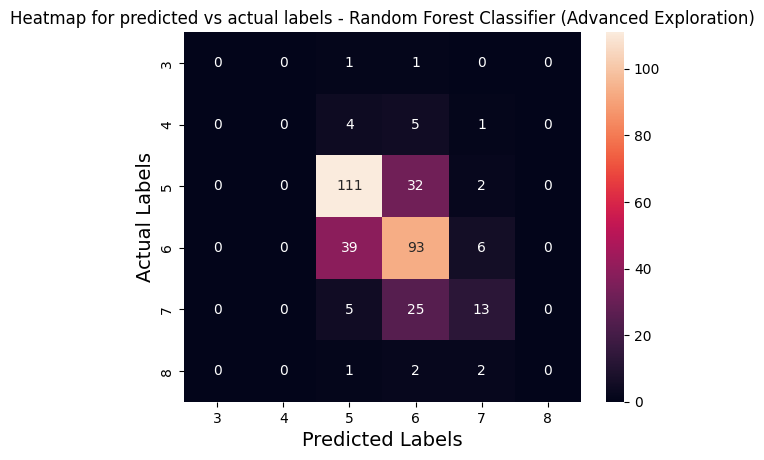

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_rfc)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,
            yticklabels=classes).set_title("Heatmap for predicted vs actual labels - Random Forest Classifier (Advanced Exploration)")
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

print(classification_report(y_test,predictions_rfc))